<a href="https://colab.research.google.com/github/cgodec/Homework_Godec/blob/master/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 6

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
from tqdm import tqdm

url = "https://downloads.psl.noaa.gov/Datasets/ghcncams/air.mon.mean.nc"
savename = url.split("/")[-1]

# Download the file
with urllib.request.urlopen(url) as response, open(savename, 'wb') as out_file:
    data = response.read()
    out_file.write(data)

# Open the dataset
ds = xr.open_dataset(savename)

# Print the dataset
print(ds)

<xarray.Dataset> Size: 960MB
Dimensions:  (lat: 360, lon: 720, time: 926)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-02-01
Data variables:
    air      (time, lat, lon) float32 960MB ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html


In [7]:
# Select the time range from 1990 to 2020
ds = ds.sel(time=slice("1990-01-01", "2020-12-31"))

# Convert temperature from Kelvin to Celsius
ds['air'] = ds['air'] - 273.15

# Calculate the annual mean temperature
annual_mean_temp = ds['air'].groupby('time.year').mean(dim='time')

# Calculate the area-weighted mean temperature
weights = np.cos(np.deg2rad(ds['lat']))
weights.name = "weights"
area_weighted_mean_temp = (annual_mean_temp * weights).mean(dim=['lat', 'lon'])

# Calculate the non-weighted mean temperature
non_weighted_mean_temp = annual_mean_temp.mean(dim=['lat', 'lon'])

# Print the results
print("Area-weighted annual mean temperature (1990-2020):")
print(area_weighted_mean_temp)
print("Non-weighted annual mean temperature (1990-2020):")
print(non_weighted_mean_temp)

Area-weighted annual mean temperature (1990-2020):
<xarray.DataArray (year: 31)> Size: 124B
array([ 9.580544 ,  9.511475 ,  9.299732 ,  9.363217 ,  9.479574 ,
        9.709152 ,  9.413442 ,  9.598614 ,  9.875066 ,  9.6995735,
        9.626438 ,  9.786988 ,  9.860357 ,  9.860876 ,  9.746962 ,
        9.960987 ,  9.878992 ,  9.95622  ,  9.788532 ,  9.823036 ,
       10.012437 ,  9.827046 ,  9.868746 ,  9.912041 ,  9.961222 ,
       10.183964 , 10.276563 , 10.171022 , 10.017762 , 10.251931 ,
       10.321029 ], dtype=float32)
Coordinates:
  * year     (year) int64 248B 1990 1991 1992 1993 1994 ... 2017 2018 2019 2020
Non-weighted annual mean temperature (1990-2020):
<xarray.DataArray 'air' (year: 31)> Size: 124B
array([ 8.785168 ,  8.714317 ,  8.3229885,  8.499462 ,  8.627416 ,
        9.096365 ,  8.573146 ,  8.85324  ,  9.191141 ,  8.96312  ,
        8.927566 ,  9.134132 ,  9.238192 ,  9.298107 ,  8.997143 ,
        9.482438 ,  9.320456 ,  9.469764 ,  9.203374 ,  9.148742 ,
        9.518

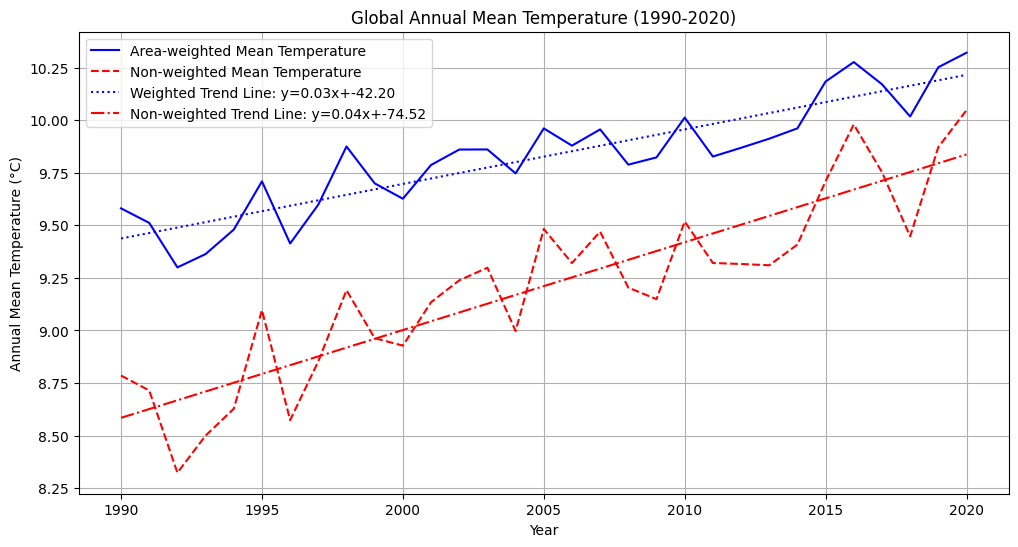

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import urllib.request

# Extract years for plotting
years = annual_mean_temp['year'].values

# Perform linear regression for trend lines
slope_aw, intercept_aw, _, _, _ = linregress(years, area_weighted_mean_temp)
slope_nw, intercept_nw, _, _, _ = linregress(years, non_weighted_mean_temp)

# Plot the time series and trend lines
plt.figure(figsize=(12, 6))
plt.plot(years, area_weighted_mean_temp, label='Area-weighted Mean Temperature', color='blue', linestyle='-')
plt.plot(years, non_weighted_mean_temp, label='Non-weighted Mean Temperature', color='red', linestyle='--')
plt.plot(years, slope_aw * years + intercept_aw, color='blue', linestyle=':', label=f'Weighted Trend Line: y={slope_aw:.2f}x+{intercept_aw:.2f}')
plt.plot(years, slope_nw * years + intercept_nw, color='red', linestyle='-.', label=f'Non-weighted Trend Line: y={slope_nw:.2f}x+{intercept_nw:.2f}')
plt.xlabel('Year')
plt.ylabel('Annual Mean Temperature (°C)')
plt.title('Global Annual Mean Temperature (1990-2020)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 58.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


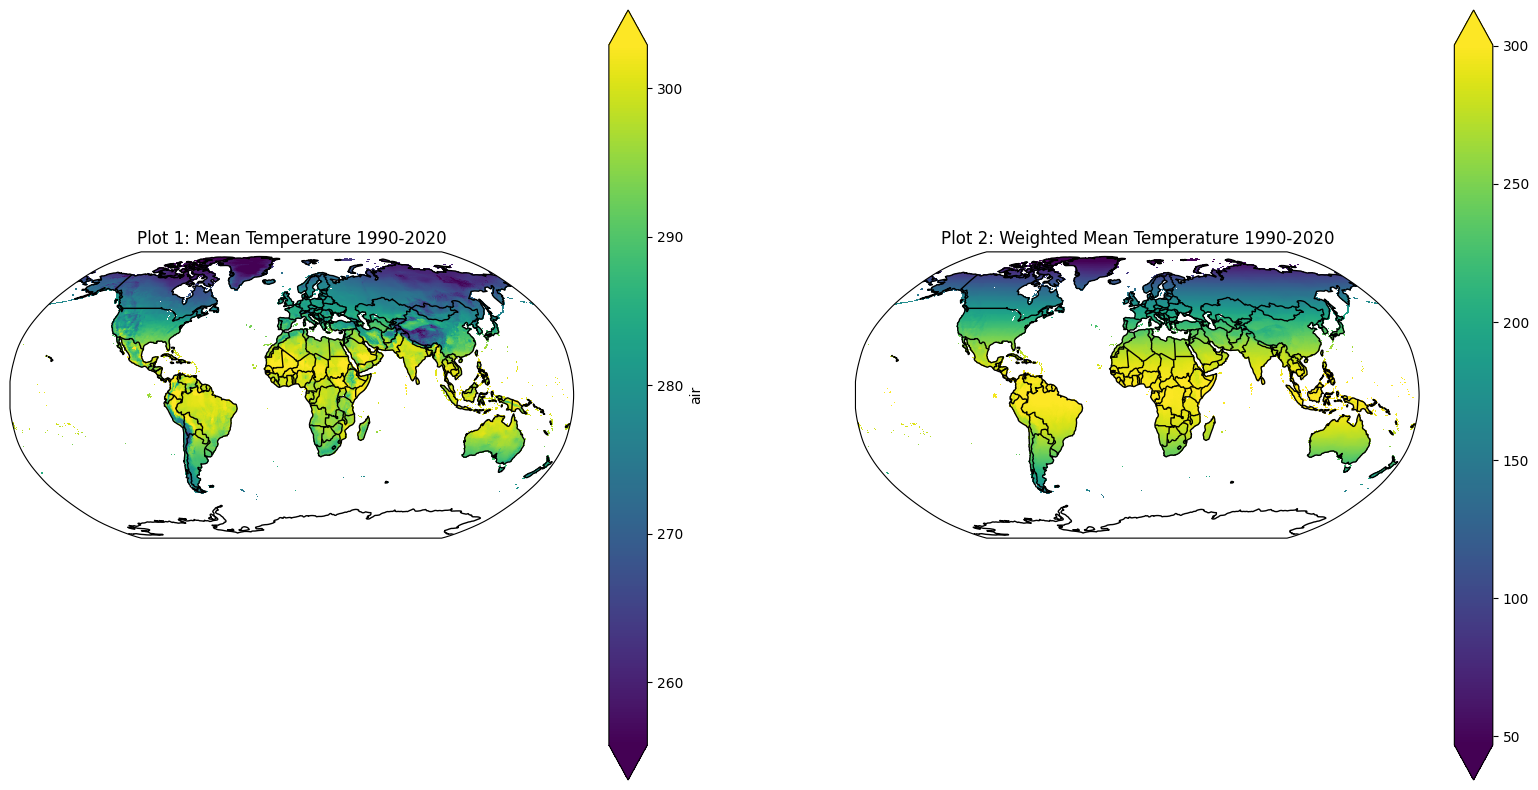

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load data
ta = xr.open_dataarray(savename)
ta_time = ta.sel(time=slice("1990-01-01", "2020-12-01"))
ta_unweight = ta_time.mean(dim="time")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': ccrs.Robinson()}, figsize=(20, 10))

# Plot the first data array
p1 = ta_unweight.isel().plot(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    robust=True,
    facecolor="gray"
)
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS)
ax1.set_title('Plot 1: Mean Temperature 1990-2020')

#Weight the ta data
ta_weighted = ta_time * weights

# Plot the second data array
ta3 = ta_weighted.mean(dim="time")
p2 = ta3.isel().plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    robust=True,
    facecolor="gray"
)
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS)
ax2.set_title('Plot 2: Weighted Mean Temperature 1990-2020')

# Display the plots
plt.show()